In [3]:
import pandas as pd
import tensorflow as tf
from tensorflow import keras 
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
#read as dataframes 
gene_df = pd.read_csv("D:\\Binformatics R&D\\Assignment2_student\\G1\\G1_breast_gene-expr.csv")
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [4]:
#genes - cols 
#samples - rows

gene_df.head()

,Unnamed: 0,Label,..100130426,..100133144,..100134869,..10357,..10431,..136542,..155060,..26823,...,ZXDA.7789,ZXDB.158586,ZXDC.79364,ZYG11A.440590,ZYG11B.79699,ZYX.7791,ZZEF1.23140,ZZZ3.26009,psiTPTE22.387590,tAKR.389932
0,TCGA.3C.AAAU.01,Primary Tumor,0.0000,16.3644,12.9316,52.1503,408.0760,0.0,1187.0050,0.0000,...,129.5917,1007.7824,1658.4983,258.4941,1208.3738,3507.2482,1894.9342,1180.4565,1.7233,0.0
1,TCGA.3C.AALI.01,Primary Tumor,0.0000,9.2659,17.3790,69.7553,563.8934,0.0,516.0413,1.0875,...,59.8151,448.6134,1343.1213,198.4774,603.5889,5504.6221,1318.6514,406.7428,926.5905,0.0
2,TCGA.3C.AALJ.01,Primary Tumor,0.9066,11.6228,9.2294,154.2974,1360.8341,0.0,592.0218,0.0000,...,35.3581,533.9982,768.8123,331.8223,532.1850,5458.7489,942.8830,509.5195,35.3581,0.0
3,TCGA.3C.AALK.01,Primary Tumor,0.0000,12.0894,11.0799,143.8643,865.5358,0.0,552.7513,0.4137,...,55.0269,437.7327,863.8808,175.4241,607.3645,5691.3529,781.1336,700.8688,66.6115,0.0
4,TCGA.4H.AAAK.01,Primary Tumor,0.0000,6.8468,14.4298,84.2128,766.3830,0.0,260.8511,0.4255,...,48.9362,424.2553,1049.7872,14.0426,775.7447,4041.7021,831.9149,881.7021,187.2340,0.0


In [5]:
gene_df.isnull().sum()

Unnamed: 0          0
Label               0
..100130426         0
..100133144         0
..100134869         0
                   ..
ZYX.7791            0
ZZEF1.23140         0
ZZZ3.26009          0
psiTPTE22.387590    0
tAKR.389932         0
Length: 20533, dtype: int64

In [6]:
#size of dfs 
gene_df.shape

(1205, 20533)

In [7]:
#label encode our data 1 - tumor and 0 for norm 

#0 = solid 
#1 = primary tumour 
bool_tumor = [0 if value == 'Solid Tissue Normal' else 1 for value in gene_df['Label'].values]
gene_df['Boolean_tumor'] = bool_tumor

labels = gene_df['Label'].values
encoder = LabelEncoder() 
encoder.fit(labels)

encoded_Y = encoder.transform(labels)


In [8]:
encoded_Y[100:130]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0])

In [9]:
gene_df[100:130]

,Unnamed: 0,Label,..100130426,..100133144,..100134869,..10357,..10431,..136542,..155060,..26823,...,ZXDB.158586,ZXDC.79364,ZYG11A.440590,ZYG11B.79699,ZYX.7791,ZZEF1.23140,ZZZ3.26009,psiTPTE22.387590,tAKR.389932,Boolean_tumor
100,TCGA.A2.A25A.01,Primary Tumor,0.0,11.5625,10.1766,87.7287,731.4312,0.0,167.7989,0.2264,...,602.8080,1208.5598,111.1866,1071.1051,3645.1540,1409.8732,1147.6449,103.7138,0.0000,1
101,TCGA.A2.A25B.01,Primary Tumor,0.0,15.1118,19.6873,116.7664,904.0872,0.0,227.7445,0.6891,...,598.4754,899.2635,226.0218,1535.2944,2856.2815,934.4072,1773.7198,13.0927,0.0000,1
102,TCGA.A2.A25C.01,Primary Tumor,0.0,21.7468,10.2338,302.2519,1150.4191,0.0,119.7618,1.3233,...,691.4424,677.7680,45.6551,815.6154,1861.7115,2210.6308,683.5024,267.3136,0.0000,1
103,TCGA.A2.A25D.01,Primary Tumor,0.0,0.9254,2.8827,100.8606,1170.6017,0.0,97.4867,0.3808,...,261.2338,1255.1409,16.7555,562.8332,3941.7365,977.5324,703.3511,515.2323,0.0000,1
104,TCGA.A2.A25E.01,Primary Tumor,0.0,11.5629,11.0786,71.7013,1484.5912,0.0,179.2453,1.5723,...,1017.6101,1127.0440,225.1572,1238.3648,1819.8113,1256.6038,1039.9371,18.8679,0.0000,1
105,TCGA.A2.A25F.01,Primary Tumor,0.0,2.6526,3.7857,96.5851,669.0703,0.0,60.2627,0.0000,...,546.7422,937.6771,152.2019,1616.5336,4547.7723,2025.2382,1264.7438,112.7994,0.0000,1
106,TCGA.A2.A3KC.01,Primary Tumor,0.0,9.5154,22.7942,92.1711,756.9679,0.0,356.1157,0.3551,...,624.8890,1163.5008,23.4333,826.5578,4669.9805,1351.3226,670.6906,102.9647,0.0000,1
107,TCGA.A2.A3KD.01,Primary Tumor,0.0,7.6046,10.4804,80.2413,929.1570,0.0,150.9065,0.8894,...,565.9734,1107.0428,5.6331,802.5616,3781.2597,1183.8302,899.8058,720.1411,0.0000,1
108,TCGA.A2.A3XS.01,Primary Tumor,0.0,16.7663,32.1504,212.4393,728.8247,0.0,575.8372,1.6415,...,338.4767,1363.4274,119.5010,657.9120,3701.5758,1016.0867,872.9481,178.5949,0.0000,1
109,TCGA.A2.A3XT.01,Primary Tumor,0.0,20.1082,18.6647,155.5003,725.9485,0.0,527.9083,1.1930,...,376.0974,1215.0839,11.0354,817.2140,5015.4272,1032.5529,916.8306,51.8961,0.0000,1


In [10]:
gene_df[gene_df['Boolean_tumor'] == 1].shape, gene_df[gene_df['Boolean_tumor'] == 0].shape

((1093, 20534), (112, 20534))

Breast Cancer tumors data

Normal tissue data

In [11]:
normal_tissue = gene_df[gene_df['Boolean_tumor'] == 0]
normal_tissue

,Unnamed: 0,Label,..100130426,..100133144,..100134869,..10357,..10431,..136542,..155060,..26823,...,ZXDB.158586,ZXDC.79364,ZYG11A.440590,ZYG11B.79699,ZYX.7791,ZZEF1.23140,ZZZ3.26009,psiTPTE22.387590,tAKR.389932,Boolean_tumor
125,TCGA.A7.A0CE.11,Solid Tissue Normal,0.0,4.3333,3.9206,78.9238,978.4127,0.0,219.0476,0.9524,...,433.3333,1034.2857,60.3175,745.0794,6455.8730,1314.2857,968.2540,265.3968,0.3175,0
128,TCGA.A7.A0CH.11,Solid Tissue Normal,0.0,4.2087,2.1852,53.6380,970.7569,0.0,136.1542,0.0000,...,374.6121,936.9064,34.6027,815.0447,6038.9281,1477.3860,620.9685,466.7607,0.0000,0
131,TCGA.A7.A0D9.11,Solid Tissue Normal,0.0,3.0550,0.0000,87.5764,770.3666,0.0,109.9796,0.0000,...,374.2363,1077.3931,1.5275,1545.3157,2344.7047,1997.9633,730.6517,346.7413,0.0000,0
134,TCGA.A7.A0DB.11,Solid Tissue Normal,0.0,3.2784,0.8454,61.2165,696.3918,0.0,106.1856,0.0000,...,380.4124,1036.5979,0.5155,1453.0928,4177.3196,1769.5876,664.4330,269.0722,0.0000,0
137,TCGA.A7.A13E.11,Solid Tissue Normal,0.0,2.0931,3.2738,103.8931,912.8577,0.0,67.3300,0.0000,...,418.1288,1002.6310,35.6166,1369.5305,4243.2515,1879.3842,877.7290,321.0371,0.0000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1018,TCGA.E9.A1RF.11,Solid Tissue Normal,0.0,2.3355,2.0787,93.3628,613.1621,0.0,116.3724,0.4013,...,487.9615,1325.0401,1.6051,1891.6533,2548.9567,1839.0851,936.9984,336.6774,0.0000,0
1021,TCGA.E9.A1RH.11,Solid Tissue Normal,0.0,2.5335,3.7479,95.9003,760.0503,0.0,144.0536,0.0000,...,436.7672,1090.8710,5.8626,1890.2848,2906.1977,1713.9866,865.1591,216.4992,0.0000,0
1023,TCGA.E9.A1RI.11,Solid Tissue Normal,0.0,1.5032,4.2933,84.4595,765.5299,0.0,64.9213,0.3864,...,547.9664,1260.5545,8.8880,2362.2838,2463.9165,1949.9565,982.7070,520.5294,0.0000,0
1099,TCGA.GI.A2C8.11,Solid Tissue Normal,0.0,6.8563,11.2410,70.5843,1698.0352,0.0,61.5305,0.5171,...,520.6825,1832.9886,1.0341,12297.8283,1842.2958,2440.0207,721.3030,250.2585,0.0000,0


In [12]:
breast_cancer = gene_df[gene_df['Boolean_tumor'] == 1]
breast_cancer

,Unnamed: 0,Label,..100130426,..100133144,..100134869,..10357,..10431,..136542,..155060,..26823,...,ZXDB.158586,ZXDC.79364,ZYG11A.440590,ZYG11B.79699,ZYX.7791,ZZEF1.23140,ZZZ3.26009,psiTPTE22.387590,tAKR.389932,Boolean_tumor
0,TCGA.3C.AAAU.01,Primary Tumor,0.0000,16.3644,12.9316,52.1503,408.0760,0.0,1187.0050,0.0000,...,1007.7824,1658.4983,258.4941,1208.3738,3507.2482,1894.9342,1180.4565,1.7233,0.0000,1
1,TCGA.3C.AALI.01,Primary Tumor,0.0000,9.2659,17.3790,69.7553,563.8934,0.0,516.0413,1.0875,...,448.6134,1343.1213,198.4774,603.5889,5504.6221,1318.6514,406.7428,926.5905,0.0000,1
2,TCGA.3C.AALJ.01,Primary Tumor,0.9066,11.6228,9.2294,154.2974,1360.8341,0.0,592.0218,0.0000,...,533.9982,768.8123,331.8223,532.1850,5458.7489,942.8830,509.5195,35.3581,0.0000,1
3,TCGA.3C.AALK.01,Primary Tumor,0.0000,12.0894,11.0799,143.8643,865.5358,0.0,552.7513,0.4137,...,437.7327,863.8808,175.4241,607.3645,5691.3529,781.1336,700.8688,66.6115,0.0000,1
4,TCGA.4H.AAAK.01,Primary Tumor,0.0000,6.8468,14.4298,84.2128,766.3830,0.0,260.8511,0.4255,...,424.2553,1049.7872,14.0426,775.7447,4041.7021,831.9149,881.7021,187.2340,0.0000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1200,TCGA.WT.AB44.01,Primary Tumor,0.0000,0.0000,3.2580,42.2643,1877.4180,0.0,704.5408,4.0725,...,243.5349,772.9587,98.5543,315.2108,10937.0800,800.6516,443.0869,724.9033,0.0000,1
1201,TCGA.XX.A899.01,Primary Tumor,0.0000,14.3858,21.4409,137.7756,652.7559,0.0,427.1654,2.7559,...,643.7008,1266.5354,21.2598,688.1890,5118.1102,1933.8583,670.0787,98.4252,0.0000,1
1202,TCGA.XX.A89A.01,Primary Tumor,0.0000,22.3240,27.2744,64.1427,722.7208,0.0,376.4761,0.4724,...,341.5210,1375.5314,164.3836,746.8115,5477.5626,1437.4114,953.7081,235.2385,0.9447,1
1203,TCGA.Z7.A8R5.01,Primary Tumor,0.0000,2.2638,7.2933,85.0461,1140.2801,0.0,252.0682,0.5973,...,248.4843,796.2249,51.9667,505.9284,6675.6264,754.4127,750.8288,238.9272,0.0000,1


**Feature selection**


In [13]:
norm = normal_tissue.iloc[:, 2:-1]
can = breast_cancer.iloc[:, 2:-1]
cat = [norm, can]
sample_set = pd.concat(cat)
sample_set

,..100130426,..100133144,..100134869,..10357,..10431,..136542,..155060,..26823,..280660,..317712,...,ZXDA.7789,ZXDB.158586,ZXDC.79364,ZYG11A.440590,ZYG11B.79699,ZYX.7791,ZZEF1.23140,ZZZ3.26009,psiTPTE22.387590,tAKR.389932
125,0.0,4.3333,3.9206,78.9238,978.4127,0.0,219.0476,0.9524,0.0,0.0,...,41.2698,433.3333,1034.2857,60.3175,745.0794,6455.8730,1314.2857,968.2540,265.3968,0.3175
128,0.0,4.2087,2.1852,53.6380,970.7569,0.0,136.1542,0.0000,0.0,0.0,...,45.5101,374.6121,936.9064,34.6027,815.0447,6038.9281,1477.3860,620.9685,466.7607,0.0000
131,0.0,3.0550,0.0000,87.5764,770.3666,0.0,109.9796,0.0000,0.0,0.0,...,94.1955,374.2363,1077.3931,1.5275,1545.3157,2344.7047,1997.9633,730.6517,346.7413,0.0000
134,0.0,3.2784,0.8454,61.2165,696.3918,0.0,106.1856,0.0000,0.0,0.0,...,75.7732,380.4124,1036.5979,0.5155,1453.0928,4177.3196,1769.5876,664.4330,269.0722,0.0000
137,0.0,2.0931,3.2738,103.8931,912.8577,0.0,67.3300,0.0000,0.0,0.0,...,86.8459,418.1288,1002.6310,35.6166,1369.5305,4243.2515,1879.3842,877.7290,321.0371,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1200,0.0,0.0000,3.2580,42.2643,1877.4180,0.0,704.5408,4.0725,0.0,0.0,...,24.4349,243.5349,772.9587,98.5543,315.2108,10937.0800,800.6516,443.0869,724.9033,0.0000
1201,0.0,14.3858,21.4409,137.7756,652.7559,0.0,427.1654,2.7559,0.0,0.0,...,70.8661,643.7008,1266.5354,21.2598,688.1890,5118.1102,1933.8583,670.0787,98.4252,0.0000
1202,0.0,22.3240,27.2744,64.1427,722.7208,0.0,376.4761,0.4724,0.0,0.0,...,48.6538,341.5210,1375.5314,164.3836,746.8115,5477.5626,1437.4114,953.7081,235.2385,0.9447
1203,0.0,2.2638,7.2933,85.0461,1140.2801,0.0,252.0682,0.5973,0.0,0.0,...,32.2552,248.4843,796.2249,51.9667,505.9284,6675.6264,754.4127,750.8288,238.9272,0.0000


Data seems to be quite sparse - lots of 0s. Since this is gene expression for RPKM values = 0 is probs not necessarily helpful for our classification analysis so we can probs dropped them for our analysis since no read was mapped in this instance


In [14]:
gene_features = sample_set.iloc[:,2:]


non_import_cols = []

#if cols contain low expression of less than 0.1 RPKM val we append and drop them 
for col in gene_features.columns:
    column = gene_features[col]
    count = len(column[column <= 0.1])
    if count > 0: #change count of 0s
        non_import_cols.append(col)

sub_df = gene_features.drop(non_import_cols, axis=1)

#print(non_import_cols)
sub_df

,..10357,..10431,..155060,..57714,..653553,..8225,A1BG.1,A2LD1.87769,A2M.2,A4GALT.53947,...,ZWILCH.55055,ZWINT.11130,ZXDA.7789,ZXDB.158586,ZXDC.79364,ZYG11B.79699,ZYX.7791,ZZEF1.23140,ZZZ3.26009,psiTPTE22.387590
125,78.9238,978.4127,219.0476,243.1746,170.4762,608.5714,154.4730,119.5810,40198.2063,627.3016,...,247.8190,213.3333,41.2698,433.3333,1034.2857,745.0794,6455.8730,1314.2857,968.2540,265.3968
128,53.6380,970.7569,136.1542,178.6554,318.9469,663.4697,109.3484,111.9699,32634.9299,924.1185,...,161.1547,144.0527,45.5101,374.6121,936.9064,815.0447,6038.9281,1477.3860,620.9685,466.7607
131,87.5764,770.3666,109.9796,816.7006,102.3422,465.8859,15.7841,105.5041,44700.9521,542.7699,...,98.2688,58.5540,94.1955,374.2363,1077.3931,1545.3157,2344.7047,1997.9633,730.6517,346.7413
134,61.2165,696.3918,106.1856,716.4948,135.0515,470.6186,19.0722,153.5670,41867.0567,648.4536,...,216.1701,156.1856,75.7732,380.4124,1036.5979,1453.0928,4177.3196,1769.5876,664.4330,269.0722
137,103.8931,912.8577,67.3300,755.2666,256.1466,356.6537,41.5445,122.7455,50626.1321,505.9505,...,169.0226,77.0879,86.8459,418.1288,1002.6310,1369.5305,4243.2515,1879.3842,877.7290,321.0371
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1200,42.2643,1877.4180,704.5408,312.7673,1523.1114,469.1509,471.2849,61.7308,5409.3097,356.7502,...,150.0143,180.8186,24.4349,243.5349,772.9587,315.2108,10937.0800,800.6516,443.0869,724.9033
1201,137.7756,652.7559,427.1654,660.2362,525.5906,603.9370,223.2205,131.2283,20348.7559,505.5118,...,456.0472,457.0866,70.8661,643.7008,1266.5354,688.1890,5118.1102,1933.8583,670.0787,98.4252
1202,64.1427,722.7208,376.4761,372.2248,500.2362,704.2985,255.1346,79.9291,17094.8370,615.4936,...,530.1984,694.3788,48.6538,341.5210,1375.5314,746.8115,5477.5626,1437.4114,953.7081,235.2385
1203,85.0461,1140.2801,252.0682,115.2824,277.7529,916.2859,439.5425,81.3010,36838.5210,456.3510,...,173.1087,258.6387,32.2552,248.4843,796.2249,505.9284,6675.6264,754.4127,750.8288,238.9272


In [15]:
(sub_df <= 0.1).sum().sum()

0

In [16]:
sub_df.max().max(), sub_df.min().min()

(1839915.7662, 0.227)

Log2 Scaling since we have gene expression data. We will want to change the scale so everything is roughly within the same limits. From doing some research it looks like log2(RPKM) is the go too scaling.

In [17]:
df_log2 = pd.DataFrame(np.log2(sub_df))

df_log2

,..10357,..10431,..155060,..57714,..653553,..8225,A1BG.1,A2LD1.87769,A2M.2,A4GALT.53947,...,ZWILCH.55055,ZWINT.11130,ZXDA.7789,ZXDB.158586,ZXDC.79364,ZYG11B.79699,ZYX.7791,ZZEF1.23140,ZZZ3.26009,psiTPTE22.387590
125,6.302389,9.934299,7.775101,7.925849,7.413427,9.249283,7.271211,6.901844,15.294844,9.293015,...,7.953143,7.736965,5.367015,8.759333,10.014419,9.541250,12.656396,10.360063,9.919242,8.052007
128,5.745184,9.922966,7.089098,7.481036,8.317172,9.373887,6.772788,6.806967,14.994129,9.851934,...,7.332302,7.170453,5.508115,8.549254,9.871761,9.670735,12.560077,10.528831,9.278376,8.866539
131,6.452470,9.589401,6.781092,9.673663,6.677257,8.863833,3.980400,6.721155,15.448018,9.084197,...,6.618662,5.871696,6.557586,8.547806,10.073329,10.593686,11.195191,10.964314,9.513040,8.437716
134,5.935849,9.443755,6.730444,9.484812,7.077366,8.878415,4.253399,7.262724,15.353528,9.340860,...,7.756023,7.287118,6.243616,8.571420,10.017641,10.504911,12.028362,10.789197,9.375980,8.071850
137,6.698956,9.834246,6.073178,9.560842,8.000826,8.478380,5.376586,6.939526,15.627595,8.982852,...,7.401072,6.268433,6.440386,8.707804,9.969575,10.419466,12.050954,10.876044,9.777632,8.326596
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1200,5.401368,10.874534,9.460539,8.288946,10.572806,8.873908,8.880456,5.947919,12.401229,8.478770,...,7.228956,7.498399,4.610871,7.927985,9.594248,8.300173,13.416940,9.645031,8.791446,9.501645
1201,7.106177,9.350400,8.738651,9.366838,9.037796,9.238254,7.802326,7.035935,14.312653,8.981601,...,8.833039,8.836324,6.147024,9.330246,10.306672,9.426661,12.321395,10.917266,9.388187,6.620956
1202,6.003213,9.497295,8.556414,8.540030,8.966466,9.460043,7.995115,6.320649,14.061273,9.265600,...,9.050389,9.439579,5.604481,8.415830,10.425773,9.544600,12.419318,10.489257,9.897404,7.877980
1203,6.410173,10.155173,7.977670,6.849028,8.117658,9.839654,8.779859,6.345201,15.168928,8.834000,...,7.435534,8.014794,5.011460,7.957011,9.637032,8.982789,12.704688,9.559210,9.552340,7.900427


In [18]:
reduced_set = pd.concat([gene_df.iloc[:,-1], sub_df], axis=1)
reduced_set


,Boolean_tumor,..10357,..10431,..155060,..57714,..653553,..8225,A1BG.1,A2LD1.87769,A2M.2,...,ZWILCH.55055,ZWINT.11130,ZXDA.7789,ZXDB.158586,ZXDC.79364,ZYG11B.79699,ZYX.7791,ZZEF1.23140,ZZZ3.26009,psiTPTE22.387590
0,1,52.1503,408.0760,1187.0050,820.9773,289.5134,458.3962,197.0897,102.9634,5798.3746,...,415.8240,931.9575,129.5917,1007.7824,1658.4983,1208.3738,3507.2482,1894.9342,1180.4565,1.7233
1,1,69.7553,563.8934,516.0413,708.5372,449.7009,683.5237,237.3844,70.8646,7571.9793,...,1161.3268,965.1985,59.8151,448.6134,1343.1213,603.5889,5504.6221,1318.6514,406.7428,926.5905
2,1,154.2974,1360.8341,592.0218,391.6591,1100.6346,657.2983,423.2366,161.2602,8840.3989,...,305.4216,2531.2783,35.3581,533.9982,768.8123,532.1850,5458.7489,942.8830,509.5195,35.3581
3,1,143.8643,865.5358,552.7513,458.0058,406.2888,786.5122,191.0178,62.5072,10960.2193,...,394.5056,668.5974,55.0269,437.7327,863.8808,607.3645,5691.3529,781.1336,700.8688,66.6115
4,1,84.2128,766.3830,260.8511,449.3617,92.7660,705.5319,268.8809,154.3702,9585.4426,...,405.7106,674.4681,48.9362,424.2553,1049.7872,775.7447,4041.7021,831.9149,881.7021,187.2340
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1200,1,42.2643,1877.4180,704.5408,312.7673,1523.1114,469.1509,471.2849,61.7308,5409.3097,...,150.0143,180.8186,24.4349,243.5349,772.9587,315.2108,10937.0800,800.6516,443.0869,724.9033
1201,1,137.7756,652.7559,427.1654,660.2362,525.5906,603.9370,223.2205,131.2283,20348.7559,...,456.0472,457.0866,70.8661,643.7008,1266.5354,688.1890,5118.1102,1933.8583,670.0787,98.4252
1202,1,64.1427,722.7208,376.4761,372.2248,500.2362,704.2985,255.1346,79.9291,17094.8370,...,530.1984,694.3788,48.6538,341.5210,1375.5314,746.8115,5477.5626,1437.4114,953.7081,235.2385
1203,1,85.0461,1140.2801,252.0682,115.2824,277.7529,916.2859,439.5425,81.3010,36838.5210,...,173.1087,258.6387,32.2552,248.4843,796.2249,505.9284,6675.6264,754.4127,750.8288,238.9272


In [19]:
normal_tissue_red = reduced_set[reduced_set['Boolean_tumor'] == 0]
normal_tissue_red

,Boolean_tumor,..10357,..10431,..155060,..57714,..653553,..8225,A1BG.1,A2LD1.87769,A2M.2,...,ZWILCH.55055,ZWINT.11130,ZXDA.7789,ZXDB.158586,ZXDC.79364,ZYG11B.79699,ZYX.7791,ZZEF1.23140,ZZZ3.26009,psiTPTE22.387590
125,0,78.9238,978.4127,219.0476,243.1746,170.4762,608.5714,154.4730,119.5810,40198.2063,...,247.8190,213.3333,41.2698,433.3333,1034.2857,745.0794,6455.8730,1314.2857,968.2540,265.3968
128,0,53.6380,970.7569,136.1542,178.6554,318.9469,663.4697,109.3484,111.9699,32634.9299,...,161.1547,144.0527,45.5101,374.6121,936.9064,815.0447,6038.9281,1477.3860,620.9685,466.7607
131,0,87.5764,770.3666,109.9796,816.7006,102.3422,465.8859,15.7841,105.5041,44700.9521,...,98.2688,58.5540,94.1955,374.2363,1077.3931,1545.3157,2344.7047,1997.9633,730.6517,346.7413
134,0,61.2165,696.3918,106.1856,716.4948,135.0515,470.6186,19.0722,153.5670,41867.0567,...,216.1701,156.1856,75.7732,380.4124,1036.5979,1453.0928,4177.3196,1769.5876,664.4330,269.0722
137,0,103.8931,912.8577,67.3300,755.2666,256.1466,356.6537,41.5445,122.7455,50626.1321,...,169.0226,77.0879,86.8459,418.1288,1002.6310,1369.5305,4243.2515,1879.3842,877.7290,321.0371
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1018,0,93.3628,613.1621,116.3724,1035.7143,194.6228,292.9374,12.4398,85.7624,38299.6228,...,166.0955,36.9181,98.3146,487.9615,1325.0401,1891.6533,2548.9567,1839.0851,936.9984,336.6774
1021,0,95.9003,760.0503,144.0536,844.6399,168.7605,428.8107,31.2605,129.7529,43016.5913,...,155.7789,55.2764,81.6583,436.7672,1090.8710,1890.2848,2906.1977,1713.9866,865.1591,216.4992
1023,0,84.4595,765.5299,64.9213,873.7320,163.0760,194.3774,12.4471,107.5297,28054.7619,...,156.1202,43.2808,83.8566,547.9664,1260.5545,2362.2838,2463.9165,1949.9565,982.7070,520.5294
1099,0,70.5843,1698.0352,61.5305,456.5667,1139.6070,628.7487,9.8242,49.1158,18552.5388,...,143.5729,16.0290,173.2161,520.6825,1832.9886,12297.8283,1842.2958,2440.0207,721.3030,250.2585


In [20]:
tumor_tissue_red = reduced_set[reduced_set['Boolean_tumor'] == 1]
tumor_tissue_red

,Boolean_tumor,..10357,..10431,..155060,..57714,..653553,..8225,A1BG.1,A2LD1.87769,A2M.2,...,ZWILCH.55055,ZWINT.11130,ZXDA.7789,ZXDB.158586,ZXDC.79364,ZYG11B.79699,ZYX.7791,ZZEF1.23140,ZZZ3.26009,psiTPTE22.387590
0,1,52.1503,408.0760,1187.0050,820.9773,289.5134,458.3962,197.0897,102.9634,5798.3746,...,415.8240,931.9575,129.5917,1007.7824,1658.4983,1208.3738,3507.2482,1894.9342,1180.4565,1.7233
1,1,69.7553,563.8934,516.0413,708.5372,449.7009,683.5237,237.3844,70.8646,7571.9793,...,1161.3268,965.1985,59.8151,448.6134,1343.1213,603.5889,5504.6221,1318.6514,406.7428,926.5905
2,1,154.2974,1360.8341,592.0218,391.6591,1100.6346,657.2983,423.2366,161.2602,8840.3989,...,305.4216,2531.2783,35.3581,533.9982,768.8123,532.1850,5458.7489,942.8830,509.5195,35.3581
3,1,143.8643,865.5358,552.7513,458.0058,406.2888,786.5122,191.0178,62.5072,10960.2193,...,394.5056,668.5974,55.0269,437.7327,863.8808,607.3645,5691.3529,781.1336,700.8688,66.6115
4,1,84.2128,766.3830,260.8511,449.3617,92.7660,705.5319,268.8809,154.3702,9585.4426,...,405.7106,674.4681,48.9362,424.2553,1049.7872,775.7447,4041.7021,831.9149,881.7021,187.2340
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1200,1,42.2643,1877.4180,704.5408,312.7673,1523.1114,469.1509,471.2849,61.7308,5409.3097,...,150.0143,180.8186,24.4349,243.5349,772.9587,315.2108,10937.0800,800.6516,443.0869,724.9033
1201,1,137.7756,652.7559,427.1654,660.2362,525.5906,603.9370,223.2205,131.2283,20348.7559,...,456.0472,457.0866,70.8661,643.7008,1266.5354,688.1890,5118.1102,1933.8583,670.0787,98.4252
1202,1,64.1427,722.7208,376.4761,372.2248,500.2362,704.2985,255.1346,79.9291,17094.8370,...,530.1984,694.3788,48.6538,341.5210,1375.5314,746.8115,5477.5626,1437.4114,953.7081,235.2385
1203,1,85.0461,1140.2801,252.0682,115.2824,277.7529,916.2859,439.5425,81.3010,36838.5210,...,173.1087,258.6387,32.2552,248.4843,796.2249,505.9284,6675.6264,754.4127,750.8288,238.9272


In [21]:
features = ['Boolean_tumor']
avg_tumour = dict()
avg_normal = dict()

#calculate means of both tumour and normal expression
for col in tumor_tissue_red.columns:
    if col not in features:
        avg = np.mean(tumor_tissue_red[col].values)
        avg_tumour[col] = avg

for col in normal_tissue_red.columns:
    if col not in features:
        avg = np.mean(normal_tissue_red[col].values)
        avg_normal[col] = avg

log_fold_change = dict()

#calculate the log fold difference
#because we don't care about the direction of change, just 
#the magnitude, get absolute fold change and then sort 
for tumour, normal in zip(avg_tumour.items(), avg_normal.items()):
    log_fold_change[tumour[0]] = np.log2(abs(tumour[1]/normal[1]))

    
largest_diff = sorted(log_fold_change.items(), key=lambda x: x[1], reverse=True)

In [22]:
log_folds = pd.DataFrame(largest_diff)
log_folds

,0,1
0,MMP11.4320,6.294312
1,ACAN.176,4.462046
2,GJB2.2706,4.298275
3,UBE2C.11065,4.213561
4,KIF4A.24137,4.068073
...,...,...
12667,FHL1.2273,-4.881995
12668,MYOM1.8736,-4.887599
12669,HBB.3043,-5.017721
12670,TTN.7273,-5.798720


In [23]:
top_genes = largest_diff[:40]
top_genes

[('MMP11.4320', 6.294312310173188),
 ('ACAN.176', 4.462045913515259),
 ('GJB2.2706', 4.298274866511738),
 ('UBE2C.11065', 4.213561140858349),
 ('KIF4A.24137', 4.068072830816011),
 ('NUF2.83540', 3.9419236293813675),
 ('MYBL2.4605', 3.870040017451388),
 ('IQGAP3.128239', 3.846829650251104),
 ('MELK.9833', 3.808633792654259),
 ('CXCL11.6373', 3.715552196948338),
 ('KIF14.9928', 3.641411834526163),
 ('PLK1.5347', 3.588422404275443),
 ('EXO1.9156', 3.58837099346737),
 ('FOXM1.2305', 3.5878828940225422),
 ('BIRC5.332', 3.585379585788228),
 ('HJURP.55355', 3.5563122790895205),
 ('TPX2.22974', 3.551697733597133),
 ('CDC20.991', 3.5485944245990493),
 ('WISP1.8840', 3.547240573017976),
 ('CXCL10.3627', 3.5266922241579866),
 ('CILP2.148113', 3.5209384625991538),
 ('KIF2C.11004', 3.5036279365231717),
 ('ISG15.9636', 3.4984315097501777),
 ('KIF20A.10112', 3.4926647904696093),
 ('PBK.55872', 3.49158416309048),
 ('GABRD.2563', 3.483712245549012),
 ('TOP2A.7153', 3.470530992762831),
 ('BUB1.699', 3.4

Take the top 40 most highly expressed genes

In [24]:
top_40_genes = []

for x in top_genes: 
    top_40_genes.append(x[0])

print(top_40_genes)

['MMP11.4320', 'ACAN.176', 'GJB2.2706', 'UBE2C.11065', 'KIF4A.24137', 'NUF2.83540', 'MYBL2.4605', 'IQGAP3.128239', 'MELK.9833', 'CXCL11.6373', 'KIF14.9928', 'PLK1.5347', 'EXO1.9156', 'FOXM1.2305', 'BIRC5.332', 'HJURP.55355', 'TPX2.22974', 'CDC20.991', 'WISP1.8840', 'CXCL10.3627', 'CILP2.148113', 'KIF2C.11004', 'ISG15.9636', 'KIF20A.10112', 'PBK.55872', 'GABRD.2563', 'TOP2A.7153', 'BUB1.699', 'FAM83D.81610', 'UHRF1.29128', 'CEP55.55165', 'DLGAP5.9787', 'MMP9.4318', 'SKA1.220134', 'CENPA.1058', 'ANLN.54443', 'NDC80.10403', 'SGOL1.151648', 'RRM2.6241', 'GDF9.2661']


In [25]:
labels = ['MMP11.4320', 'ACAN.176', 'GJB2.2706', 
'UBE2C.11065', 'KIF4A.24137', 'NUF2.83540', 'MYBL2.4605', 'IQGAP3.128239', 
'MELK.9833', 'CXCL11.6373', 'KIF14.9928', 'PLK1.5347', 'EXO1.9156', 'FOXM1.2305',
'BIRC5.332', 'HJURP.55355', 'TPX2.22974', 'CDC20.991', 'WISP1.8840', 'CXCL10.3627', 
'CILP2.148113', 'KIF2C.11004', 'ISG15.9636', 'KIF20A.10112', 'PBK.55872', 'GABRD.2563', 
'TOP2A.7153', 'BUB1.699', 'FAM83D.81610', 'UHRF1.29128', 'CEP55.55165', 'DLGAP5.9787', 
'MMP9.4318', 'SKA1.220134', 'CENPA.1058', 
'ANLN.54443', 'NDC80.10403', 'SGOL1.151648', 'RRM2.6241', 'GDF9.2661']

selected_features = reduced_set[labels]
feature_set = pd.concat([reduced_set.iloc[:,0],selected_features], axis=1)
feature_set

,Boolean_tumor,MMP11.4320,ACAN.176,GJB2.2706,UBE2C.11065,KIF4A.24137,NUF2.83540,MYBL2.4605,IQGAP3.128239,MELK.9833,...,CEP55.55165,DLGAP5.9787,MMP9.4318,SKA1.220134,CENPA.1058,ANLN.54443,NDC80.10403,SGOL1.151648,RRM2.6241,GDF9.2661
0,1,11505.4008,25.8494,299.8532,555.5900,713.4438,295.0280,749.9776,1707.7845,264.3533,...,319.8434,239.8825,479.0758,244.0184,89.2666,828.2151,353.9646,66.5192,1477.2077,36.8785
1,1,9584.5568,122.8929,562.8059,1351.2779,767.2648,494.2904,4292.5503,1754.7580,487.7651,...,572.5938,521.4791,2176.1827,121.2616,343.6650,1566.0685,293.6378,230.5601,3219.1408,38.6079
2,1,14854.9411,102.4479,743.4270,1195.8296,628.2865,472.3481,2933.8169,1932.0036,546.6908,...,325.4760,246.6002,10150.4986,324.5694,236.6274,637.3527,484.1342,101.5413,1305.5304,21.7588
3,1,8525.4448,31.8577,2040.1324,496.8970,378.5685,158.8746,503.5168,618.1216,245.7592,...,290.8564,197.7658,439.8014,93.9181,68.2664,631.7749,183.6988,44.2698,909.3918,36.8225
4,1,32954.0426,19.5745,1945.5319,322.1277,260.4255,122.5532,481.7021,500.8511,245.5319,...,207.2340,196.5957,850.2128,83.4043,61.2766,359.5745,177.8723,37.0213,384.2553,15.7447
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1200,1,9205.4571,41.5394,4528.6092,54.5714,6.5160,35.8379,32.5799,61.9019,13.0320,...,26.0639,4.0725,750.9672,6.5160,6.5160,65.1598,27.6929,1.6290,21.1769,57.8294
1201,1,7656.2992,35.8268,648.8189,266.1417,248.4252,103.9370,280.3150,819.6850,97.2441,...,218.1102,154.7244,2220.4724,61.8110,27.9528,724.4094,121.6535,42.9134,211.0236,7.8740
1202,1,11416.6273,12.2815,1115.7298,375.5314,427.0194,103.9206,437.8838,283.8923,218.2333,...,240.4346,135.5692,1840.3401,44.4025,49.5985,209.7308,106.7548,40.1512,324.9882,150.2126
1203,1,2920.8852,34.0471,298.6590,136.7858,54.9533,36.4364,172.0276,93.7789,38.8257,...,80.6379,49.5774,1920.9748,30.4632,19.1142,77.6513,71.6782,6.5705,179.7927,193.5310


In [26]:
logged_features = np.log2(feature_set.iloc[:,1:])
logged_features

,MMP11.4320,ACAN.176,GJB2.2706,UBE2C.11065,KIF4A.24137,NUF2.83540,MYBL2.4605,IQGAP3.128239,MELK.9833,CXCL11.6373,...,CEP55.55165,DLGAP5.9787,MMP9.4318,SKA1.220134,CENPA.1058,ANLN.54443,NDC80.10403,SGOL1.151648,RRM2.6241,GDF9.2661
0,13.490024,4.692059,8.228113,9.117877,9.478656,8.204708,9.550704,10.737910,8.046324,3.321221,...,8.321222,7.906184,8.904110,7.930846,6.480049,9.693862,8.467461,6.055699,10.528657,5.204708
1,13.226496,6.941258,9.136494,10.400109,9.583581,8.949215,12.067619,10.777056,8.930043,9.840467,...,9.161368,9.026466,11.087584,6.921979,8.424859,10.612932,8.197894,7.848999,11.652460,5.270824
2,13.858655,6.678747,9.538047,10.223796,9.295279,8.883707,11.518563,10.915882,9.094581,7.233606,...,8.346407,7.946030,13.309263,8.342383,7.886473,9.315948,8.919263,6.665923,10.350420,4.443527
3,13.057559,4.993570,10.994447,8.956803,8.564411,7.311745,8.975896,9.271747,7.941102,5.965186,...,8.184163,7.627649,8.780708,6.553331,6.093104,9.303267,7.521198,5.468251,9.828758,5.202516
4,15.008168,4.290904,10.925949,8.331489,8.024727,6.937264,8.911997,8.968238,7.939767,6.251155,...,7.695117,7.619088,9.731680,6.382050,5.937264,8.490147,7.474698,5.210284,8.585921,3.976794
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1200,13.168274,5.376408,12.144852,5.770073,2.703987,5.163414,5.025910,5.951912,3.703987,3.703987,...,4.703981,2.025915,9.552606,2.703987,2.703987,6.025910,4.791444,0.703987,4.404420,5.853731
1201,12.902431,5.162967,9.341672,8.056051,7.956668,6.699566,8.130905,9.678926,6.603539,7.519358,...,7.768913,7.273557,11.116651,5.949792,4.804921,9.500661,6.926634,5.423356,7.721261,2.977097
1202,13.478849,3.618415,10.123772,8.552790,8.738158,6.699338,8.774404,8.149200,7.769727,8.039512,...,7.909501,7.082886,10.845757,5.472569,5.632225,7.712395,6.738157,5.327371,8.344244,7.230862
1203,11.512190,5.089460,8.222355,7.095775,5.780134,5.187309,7.426496,6.551191,5.278940,3.578504,...,6.333386,5.631611,10.907623,4.928996,4.256573,6.278938,6.163463,2.716003,7.490191,7.596421


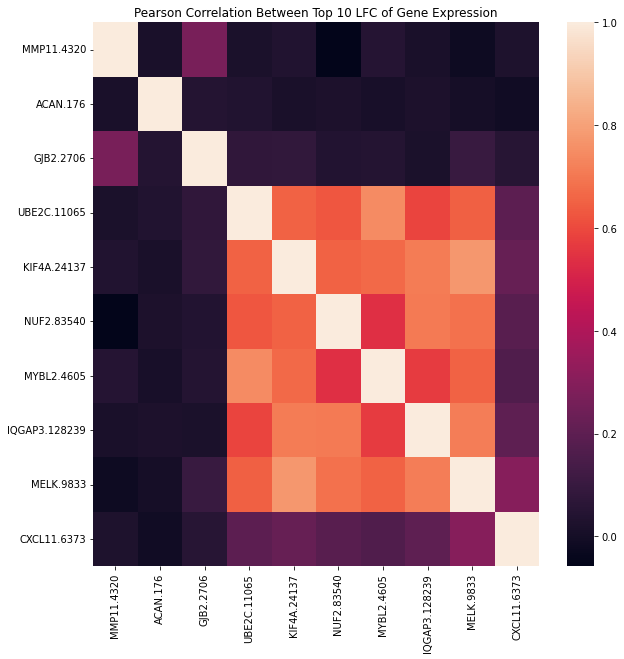

In [27]:
plt.figure(figsize=(10,10))
sns.heatmap(selected_features.iloc[:,0:10].corr())
plt.title("Pearson Correlation Between Top 10 LFC of Gene Expression")
plt.savefig("genecorrelation.png")

First 10 cols from sub_df

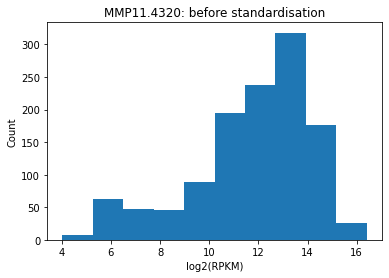

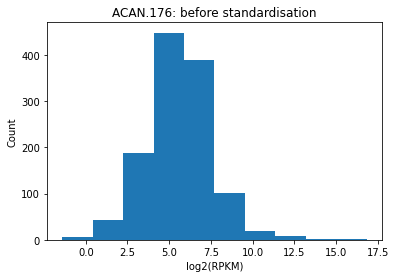

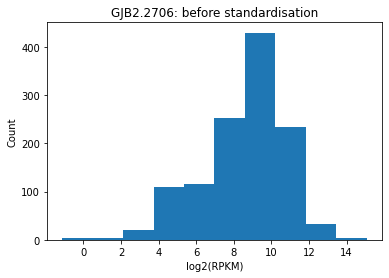

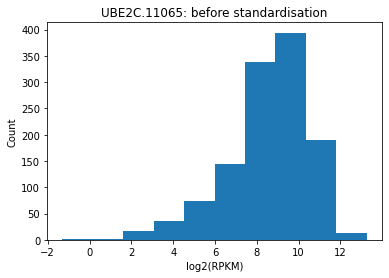

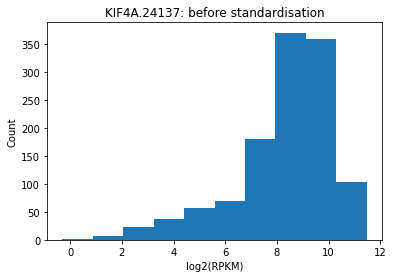

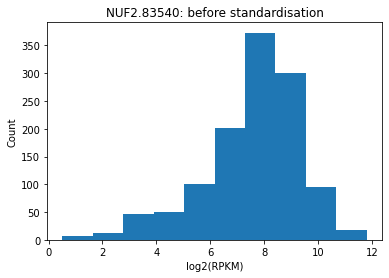

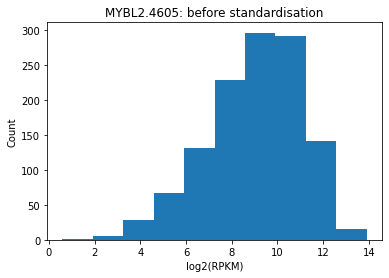

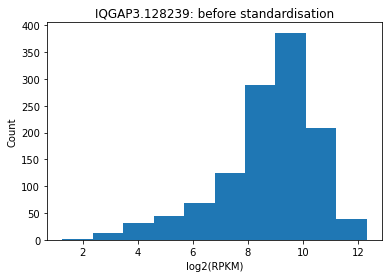

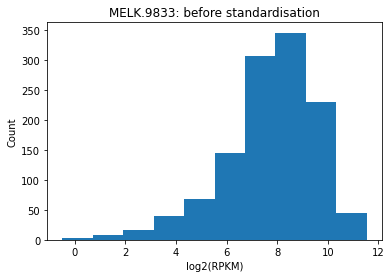

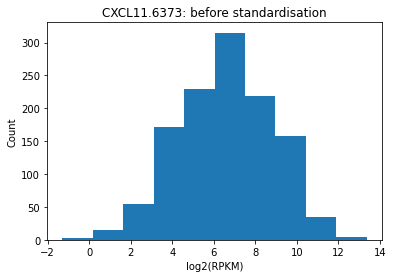

In [28]:
from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplot as plt

for i in logged_features.columns[0:10]:
    vals = logged_features[i].values
    plt.hist(vals)
    plt.title(f"{i}: " + "before standardisation")
    plt.xlabel("log2(RPKM)")
    plt.ylabel("Count")
    plt.show()


Looks like our data follows a guassian closely, so probs best to use standardisation as a precaution and to control outliers 

In [29]:


scaler = StandardScaler()
#log diff features
standard_data = scaler.fit_transform(logged_features)
#reduced set with 12k features
standard_data_red = scaler.fit_transform(reduced_set.iloc[:,1:])

standard_data

array([[ 0.7091552 , -0.46635812, -0.14799839, ...,  0.16401238,
         0.69566276,  0.50769586],
       [ 0.60039796,  0.68476458,  0.26518052, ...,  1.1859731 ,
         1.35949217,  0.54680246],
       [ 0.86128864,  0.55041338,  0.44782798, ...,  0.51176503,
         0.59037854,  0.05746967],
       ...,
       [ 0.70454342, -1.01584088,  0.714246  , ..., -0.25104492,
        -0.59466828,  1.70613302],
       [-0.10709222, -0.26297128, -0.15061705, ..., -1.73920381,
        -1.09915655,  1.92235515],
       [ 1.1199926 , -0.98098369, -0.08260396, ...,  0.91752296,
         0.36827449,  0.17781591]])

In [30]:
df_standard = (logged_features-logged_features.mean())/logged_features.std()

df_standard = pd.DataFrame(df_standard)
df_standard

,MMP11.4320,ACAN.176,GJB2.2706,UBE2C.11065,KIF4A.24137,NUF2.83540,MYBL2.4605,IQGAP3.128239,MELK.9833,CXCL11.6373,...,CEP55.55165,DLGAP5.9787,MMP9.4318,SKA1.220134,CENPA.1058,ANLN.54443,NDC80.10403,SGOL1.151648,RRM2.6241,GDF9.2661
0,0.708861,-0.466165,-0.147937,0.273488,0.621269,0.350828,0.266155,1.123736,0.154549,-1.456216,...,0.141667,0.130822,-0.368541,0.824219,0.072795,0.408545,0.570769,0.163944,0.695374,0.507485
1,0.600149,0.684480,0.265070,0.930074,0.677434,0.765067,1.494704,1.145718,0.632261,1.433910,...,0.654969,0.762432,0.632439,0.210962,1.198345,0.956958,0.406969,1.185481,1.358928,0.546576
2,0.860931,0.550185,0.447642,0.839791,0.523110,0.728619,1.226700,1.223671,0.721205,0.278231,...,0.157055,0.153287,1.650934,1.074378,0.886757,0.183042,0.845303,0.511553,0.590134,0.057446
3,0.530458,-0.311917,1.109813,0.191007,0.131886,-0.146010,-0.014418,0.300455,0.097670,-0.284088,...,0.057929,-0.026215,-0.425113,-0.013126,-0.151147,0.175475,-0.004220,-0.170690,0.282116,0.506189
4,1.335135,-0.671388,1.078670,-0.129194,-0.157000,-0.354369,-0.045608,0.130029,0.096948,-0.157312,...,-0.240862,-0.031042,0.010846,-0.117243,-0.241338,-0.309717,-0.032475,-0.317639,-0.451722,-0.218504
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1200,0.576131,-0.116065,1.632860,-1.440806,-3.005124,-1.341327,-1.942473,-1.563701,-2.192785,-1.286527,...,-2.068346,-3.184453,-0.071248,-2.353014,-2.112582,-1.780137,-1.662934,-2.884608,-2.920706,0.891212
1201,0.466464,-0.225257,0.358358,-0.270236,-0.193431,-0.486623,-0.426872,0.529095,-0.625376,0.404911,...,-0.195775,-0.225851,0.645765,-0.379998,-0.896677,0.293261,-0.365502,-0.196264,-0.962264,-0.809564
1202,0.704251,-1.015419,0.713950,-0.015874,0.224890,-0.486749,-0.112770,-0.329878,0.005030,0.635507,...,-0.109881,-0.333351,0.521577,-0.670086,-0.417879,-0.773805,-0.480029,-0.250941,-0.594421,1.705425
1203,-0.107048,-0.262862,-0.150555,-0.761960,-1.358502,-1.328032,-0.770706,-1.227193,-1.341413,-1.342157,...,-1.072834,-1.151574,0.549939,-1.000506,-1.214030,-1.629154,-0.829237,-1.738482,-1.098700,1.921557


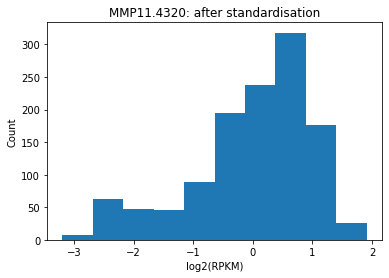

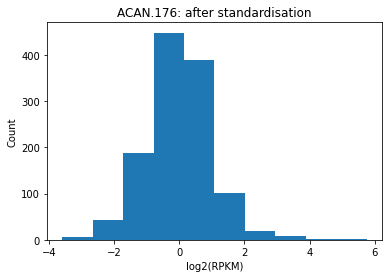

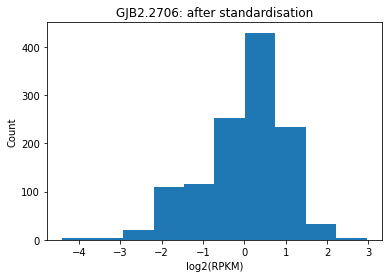

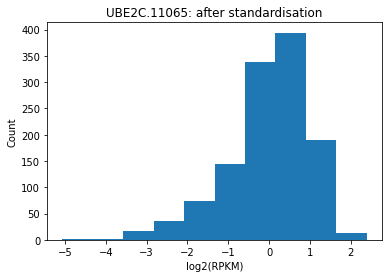

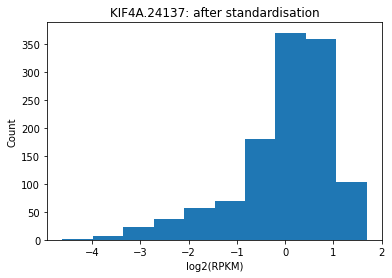

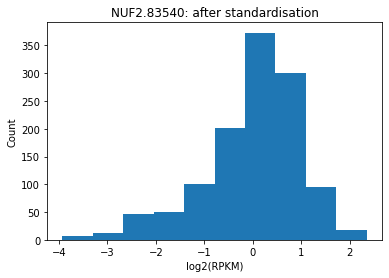

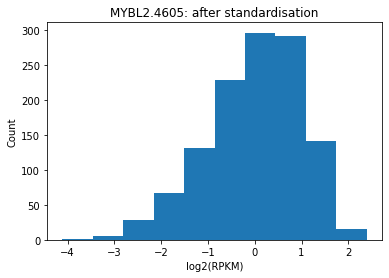

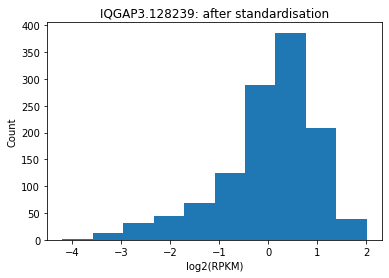

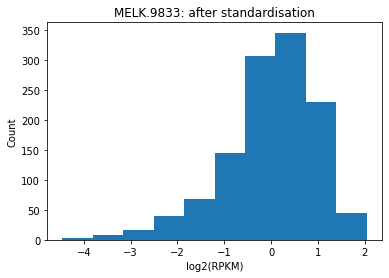

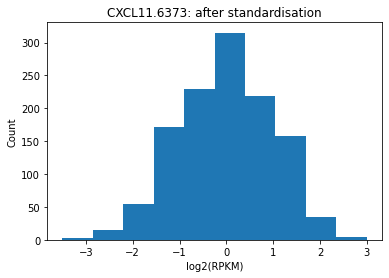

In [31]:
for i in df_standard.columns[0:10]:
    vals = df_standard[i].values
    plt.hist(vals)
    plt.title(f"{i}: " + "after standardisation")
    plt.xlabel("log2(RPKM)")
    plt.ylabel("Count")
    plt.show()

PCA of using the 12k features

In [32]:
from sklearn.decomposition import PCA
pca_red = PCA(n_components=10)

principalComponents_red = pca_red.fit_transform(standard_data_red)
principal_df = pd.DataFrame(data = principalComponents_red, columns = ['PC0', 'PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7','PC8', 'PC9'])
final_df_red = pd.concat([principal_df, feature_set[['Boolean_tumor']]], axis = 1)
final_df_red

,PC0,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,Boolean_tumor
0,7.286182,-8.793702,-29.995977,39.171440,-19.148417,-25.353311,17.286750,5.147692,-0.302238,2.525114,1
1,51.481276,-2.828464,-11.844510,6.867557,-23.523590,-20.552660,22.037593,-15.981521,5.012205,36.073049,1
2,55.584133,-6.900101,-6.345435,14.345088,-15.397091,-8.724810,16.261465,-30.711349,2.048580,18.932396,1
3,32.150860,-19.861813,-4.315494,5.534961,-18.246697,-6.625681,-14.400387,-16.505664,-2.129932,10.083518,1
4,17.394027,-22.472003,-0.326053,15.320496,-18.960089,-6.085068,-11.635709,-19.900210,-6.945737,-9.174381,1
...,...,...,...,...,...,...,...,...,...,...,...
1200,65.894812,-33.887459,2.500520,16.217898,14.904412,43.127425,-25.824661,-22.947882,31.048504,12.222044,1
1201,-0.992197,-25.074662,21.311253,14.486214,-29.190946,3.659567,10.263967,-6.092529,1.915088,-5.653933,1
1202,6.306899,-29.038886,25.875065,-2.066027,-30.244672,2.810538,2.080669,-15.945896,6.591552,6.391444,1
1203,77.398108,-36.098638,21.569969,1.711887,16.029307,23.281864,-7.481024,4.070396,-17.304372,-3.302241,1


Text(0.5, 1.0, 'PCA of RPKM 12k reduced dataset: PC1 vs PC2 of tumor - 1 vs normal tissue - 0')

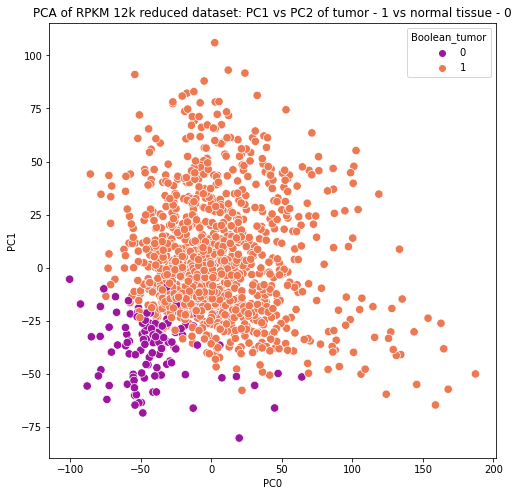

In [33]:
import seaborn as sns
from matplotlib import pyplot as plt 


plt.figure(figsize=(8,8))
sns.scatterplot(data = final_df_red , x = 'PC0',y = 'PC1', hue='Boolean_tumor', s = 70, palette="plasma")
plt.title("PCA of RPKM 12k reduced dataset: PC1 vs PC2 of tumor - 1 vs normal tissue - 0")

Text(0.5, 1.0, 'Scree plot of eigenvectors vs eigenvalues of 12k reduced dataset')

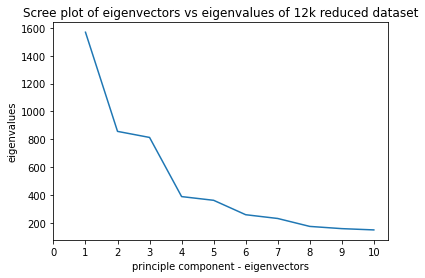

In [34]:
pc_vals = np.arange(pca_red.n_components_) + 1
plt.plot(pc_vals, pca_red.explained_variance_)
plt.xlabel("principle component - eigenvectors")
plt.ylabel("eigenvalues")
plt.xticks(np.arange(0, 11, 1))

plt.title("Scree plot of eigenvectors vs eigenvalues of 12k reduced dataset")

Text(0.5, 1.0, 'Proportion of variance explained of 12k reduced dataset')

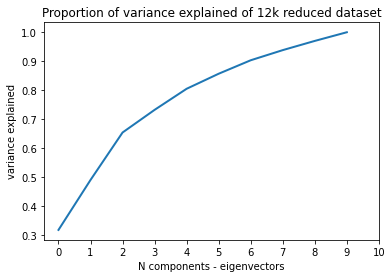

In [35]:
percentage_var_explained = pca_red.explained_variance_ / np.sum(pca_red.explained_variance_)
cumulative_var_explained = np.cumsum(percentage_var_explained)

plt.plot(cumulative_var_explained, linewidth=2)
plt.xlabel("N components - eigenvectors")
plt.ylabel("variance explained")
plt.xticks(np.arange(0, 11, 1))
plt.title("Proportion of variance explained of 12k reduced dataset")

PCA of using the log_diff 20 features

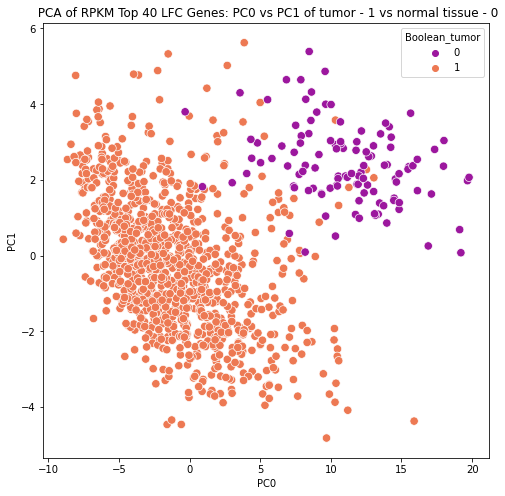

In [36]:
import seaborn as sns
from matplotlib import pyplot as plt 
from sklearn.decomposition import PCA
pca = PCA(n_components=10)
principalComponents = pca.fit_transform(standard_data)

principal_df = pd.DataFrame(data = principalComponents, columns = ['PC0', 'PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7','PC8', 'PC9'])
final_df = pd.concat([principal_df, feature_set[['Boolean_tumor']]], axis = 1)

plt.figure(figsize=(8,8))
sns.scatterplot(data = final_df , x = 'PC0',y = 'PC1', hue='Boolean_tumor', s = 70, palette="plasma")
plt.title(" PCA of RPKM Top 40 LFC Genes: PC0 vs PC1 of tumor - 1 vs normal tissue - 0")
plt.savefig("PCA.png")

Scree plots of log_diff

Text(0.5, 1.0, 'Scree plot of eigenvectors vs eigenvalues of top 40 LFC genes')

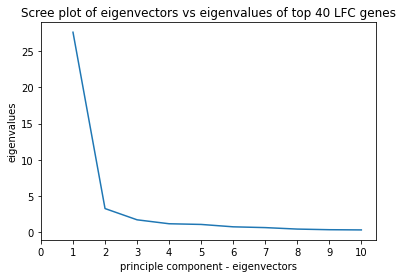

In [37]:
pc_vals = np.arange(pca.n_components_) + 1
plt.plot(pc_vals, pca.explained_variance_)
plt.xlabel("principle component - eigenvectors")
plt.ylabel("eigenvalues")
plt.xticks(np.arange(0, 11, 1))

plt.title("Scree plot of eigenvectors vs eigenvalues of top 40 LFC genes")

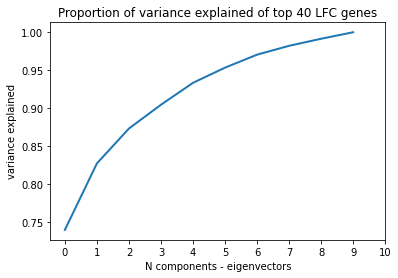

In [38]:
percentage_var_explained = pca.explained_variance_ / np.sum(pca.explained_variance_)
cumulative_var_explained = np.cumsum(percentage_var_explained)

plt.plot(cumulative_var_explained, linewidth=2)
plt.xlabel("N components - eigenvectors")
plt.ylabel("variance explained")
plt.xticks(np.arange(0, 11, 1))
plt.title("Proportion of variance explained of top 40 LFC genes")
plt.savefig("varianceexplained.png")

Perform Linear SVM with PCA data from 12k feature reduction set --> 8 PCs

In [39]:
features=['PC1', 'PC2'] #change this to how many PCs you want
xp=final_df[features] # since these are the features we take them as x
yp=final_df['Boolean_tumor'] # since labels is the output or label we'll take it as y
x_trainp, x_testp, y_trainp, y_testp = train_test_split(xp, yp, test_size = 0.3,random_state=1)
print(x_trainp.shape)
print(x_testp.shape)
print(y_trainp.shape)
print(y_testp.shape)

(843, 2)
(362, 2)
(843,)
(362,)


In [40]:
from sklearn import svm
svm_classifier_pca = svm.SVC()
svm_classifier_pca.fit(x_trainp, y_trainp)

y_pred_pca =svm_classifier_pca.predict(x_testp)

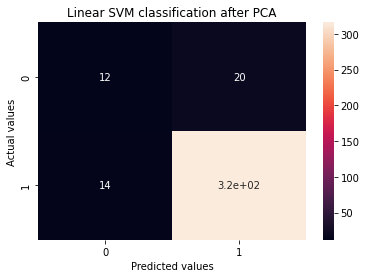

'\nscikit-learn has there axes flipped for the confusion matrix\nTOP LH corner - TN\nTOP RH corner - FP\nBOTTOM LH corner - FN\nBOTTOM RH corner - TP\n'

In [41]:
confusion_mat_pca = confusion_matrix(y_testp, y_pred_pca)
ax4 = sns.heatmap(confusion_mat_pca, annot=True)
ax4.set_title('Linear SVM classification after PCA')
ax4.set_xlabel('Predicted values')
ax4.set_ylabel('Actual values')
plt.savefig("confusionmatrixafterpca.png")
plt.show()


"""
scikit-learn has there axes flipped for the confusion matrix
TOP LH corner - TN
TOP RH corner - FP
BOTTOM LH corner - FN
BOTTOM RH corner - TP
"""

Flip confusion matrix

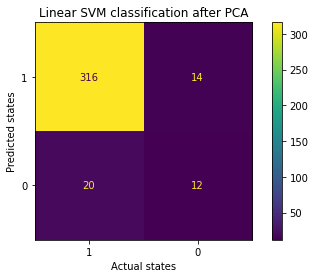

In [42]:
from sklearn.metrics import ConfusionMatrixDisplay

fig, ax = plt.subplots(1,1,figsize=(7,4))

ConfusionMatrixDisplay(confusion_matrix(y_testp, y_pred_pca,labels=[1,0]),
                       display_labels=[1,0]).plot(values_format=".0f",ax=ax)

ax.set_title('Linear SVM classification after PCA')
plt.ylabel('Predicted states')
plt.xlabel('Actual states')
plt.savefig("confusionmatrixafterpca.png")
plt.show()

In [43]:
print('\n accuracy SVM of PCA: ', svm_classifier_pca.score(x_testp, y_testp))


 accuracy SVM of PCA:  0.9060773480662984


In [44]:
X=standard_data

labels = gene_df['Label'].values
encoder = LabelEncoder() 
encoder.fit(labels)

encoded_Y = encoder.transform(labels)

X_train,X_test,Y_train,Y_test=train_test_split(X,encoded_Y,test_size=0.3,random_state=42)

#data shapes - check split data
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(843, 40)
(362, 40)
(843,)
(362,)


Linear SVMs - logg_diff data

In [45]:
from sklearn import svm
import pickle 

svm_classifier = svm.SVC()
svm_classifier.fit(X_train,Y_train)

y_pred=svm_classifier.predict(X_test)


In [46]:
print(y_pred)

[0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1
 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1]


In [47]:
filename = 'SVM_linear_classifier.sav'
pickle.dump(svm_classifier, open(filename, 'wb'))

In [48]:
from sklearn.metrics import classification_report

print(classification_report(Y_test, y_pred))
#metrics.precision_score(Y_test, y_pred=y_pred)
metrics.recall_score(Y_test, y_pred)

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       326
           1       0.97      0.89      0.93        36

    accuracy                           0.99       362
   macro avg       0.98      0.94      0.96       362
weighted avg       0.99      0.99      0.99       362



0.8888888888888888

In [49]:
#output report of findings 
report1=pd.DataFrame()
report1['Actual values']=Y_test
report1['Predicted values by SVM']= y_pred

print(report1)

     Actual values  Predicted values by SVM
0                0                        0
1                0                        0
2                0                        0
3                0                        0
4                0                        0
..             ...                      ...
357              0                        0
358              0                        0
359              1                        1
360              0                        0
361              1                        1

[362 rows x 2 columns]


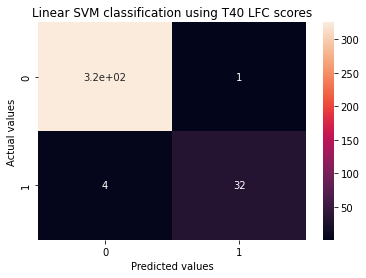


 accuracy SVM using log diff scores:  0.9861878453038674


In [50]:

confusion_mat = confusion_matrix(Y_test,y_pred)

ax = sns.heatmap(confusion_mat, annot=True)
ax.set_title('Linear SVM classification using T40 LFC scores')
ax.set_xlabel('Predicted values')
ax.set_ylabel('Actual values')
plt.savefig("confusionmatrixlinear.png")
plt.show()

print('\n accuracy SVM using log diff scores: ', svm_classifier.score(X_test, Y_test))

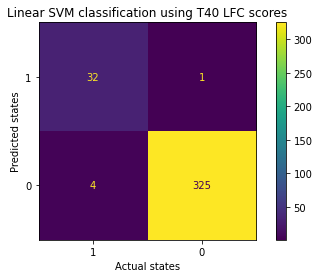

In [51]:
from sklearn.metrics import ConfusionMatrixDisplay

fig, ax = plt.subplots(1,1,figsize=(7,4))

ConfusionMatrixDisplay(confusion_matrix(y_pred,Y_test,labels=[1,0]),
                       display_labels=[1,0]).plot(values_format=".0f",ax=ax)

ax.set_title('Linear SVM classification using T40 LFC scores')
plt.ylabel('Predicted states')
plt.xlabel('Actual states')
plt.savefig("confusionmatrixlinear.png")
plt.show()

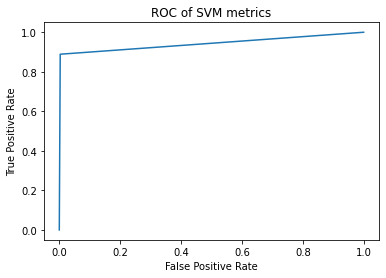

In [52]:
import sklearn.metrics as metrics

fpr, tpr, i = metrics.roc_curve(Y_test,  y_pred)

plt.plot(fpr,tpr)
plt.title("ROC of SVM metrics")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Non-linear SVMs

In [53]:
svm_non_linear = svm.SVC(kernel='rbf')
svm_non_linear.fit(X_train, Y_train)

y_pred_nonlinear =svm_non_linear.predict(X_test)

In [54]:
from sklearn.metrics import classification_report

print(classification_report(Y_test, y_pred_nonlinear))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       326
           1       0.97      0.89      0.93        36

    accuracy                           0.99       362
   macro avg       0.98      0.94      0.96       362
weighted avg       0.99      0.99      0.99       362



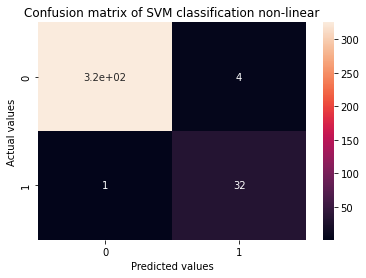


 accuracy SVM non-linear:  0.9861878453038674


<Figure size 432x288 with 0 Axes>

In [55]:

confusion_mat_nonlinear = confusion_matrix(y_pred_nonlinear, Y_test)

ax = sns.heatmap(confusion_mat_nonlinear, annot=True)
ax.set_title('Confusion matrix of SVM classification non-linear')
ax.set_xlabel('Predicted values')
ax.set_ylabel('Actual values')

plt.show()

plt.savefig("confusionmatrix.png")
print('\n accuracy SVM non-linear: ', svm_non_linear.score(X_test, Y_test))

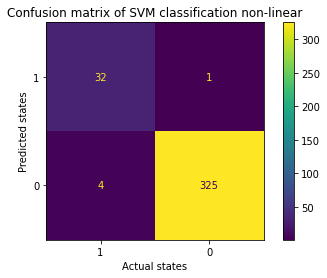

In [56]:
from sklearn.metrics import ConfusionMatrixDisplay

fig, ax = plt.subplots(1,1,figsize=(7,4))

ConfusionMatrixDisplay(confusion_matrix(y_pred_nonlinear,Y_test,labels=[1,0]),
                       display_labels=[1,0]).plot(values_format=".0f",ax=ax)

ax.set_title('Confusion matrix of SVM classification non-linear')
plt.ylabel('Predicted states')
plt.xlabel('Actual states')
plt.show()

Neural network classification

In [57]:
neural_net_df = pd.read_csv("D:\\Binformatics R&D\\Assignment2_student\\G1\\G1_breast_gene-expr.csv")

data = logged_features
data


,MMP11.4320,ACAN.176,GJB2.2706,UBE2C.11065,KIF4A.24137,NUF2.83540,MYBL2.4605,IQGAP3.128239,MELK.9833,CXCL11.6373,...,CEP55.55165,DLGAP5.9787,MMP9.4318,SKA1.220134,CENPA.1058,ANLN.54443,NDC80.10403,SGOL1.151648,RRM2.6241,GDF9.2661
0,13.490024,4.692059,8.228113,9.117877,9.478656,8.204708,9.550704,10.737910,8.046324,3.321221,...,8.321222,7.906184,8.904110,7.930846,6.480049,9.693862,8.467461,6.055699,10.528657,5.204708
1,13.226496,6.941258,9.136494,10.400109,9.583581,8.949215,12.067619,10.777056,8.930043,9.840467,...,9.161368,9.026466,11.087584,6.921979,8.424859,10.612932,8.197894,7.848999,11.652460,5.270824
2,13.858655,6.678747,9.538047,10.223796,9.295279,8.883707,11.518563,10.915882,9.094581,7.233606,...,8.346407,7.946030,13.309263,8.342383,7.886473,9.315948,8.919263,6.665923,10.350420,4.443527
3,13.057559,4.993570,10.994447,8.956803,8.564411,7.311745,8.975896,9.271747,7.941102,5.965186,...,8.184163,7.627649,8.780708,6.553331,6.093104,9.303267,7.521198,5.468251,9.828758,5.202516
4,15.008168,4.290904,10.925949,8.331489,8.024727,6.937264,8.911997,8.968238,7.939767,6.251155,...,7.695117,7.619088,9.731680,6.382050,5.937264,8.490147,7.474698,5.210284,8.585921,3.976794
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1200,13.168274,5.376408,12.144852,5.770073,2.703987,5.163414,5.025910,5.951912,3.703987,3.703987,...,4.703981,2.025915,9.552606,2.703987,2.703987,6.025910,4.791444,0.703987,4.404420,5.853731
1201,12.902431,5.162967,9.341672,8.056051,7.956668,6.699566,8.130905,9.678926,6.603539,7.519358,...,7.768913,7.273557,11.116651,5.949792,4.804921,9.500661,6.926634,5.423356,7.721261,2.977097
1202,13.478849,3.618415,10.123772,8.552790,8.738158,6.699338,8.774404,8.149200,7.769727,8.039512,...,7.909501,7.082886,10.845757,5.472569,5.632225,7.712395,6.738157,5.327371,8.344244,7.230862
1203,11.512190,5.089460,8.222355,7.095775,5.780134,5.187309,7.426496,6.551191,5.278940,3.578504,...,6.333386,5.631611,10.907623,4.928996,4.256573,6.278938,6.163463,2.716003,7.490191,7.596421


In [58]:

#turns the encodings into vectors 
dummy_y = np_utils.to_categorical(encoded_Y)
# Let's say we want to split the data in 75 /12.5 /12.5 for train / valid / test dataset
X_train_n, X_remain_n, y_train_n, y_remain_n = train_test_split(standard_data, dummy_y, train_size=0.75, shuffle=True, random_state=7)

# Now since we want the valid and test size to be equal (10% each of overall data). 
# we have to define valid_size=0.5 (that is 50% of remaining data)
X_val_n, X_test_n, y_val_n, y_test_n = train_test_split(X_remain_n,y_remain_n, test_size=0.3, shuffle=True, random_state=7)
print(X_train_n.shape), print(y_train_n.shape)
print(X_remain_n.shape), print(y_remain_n.shape)
print(X_test_n.shape), print(y_test_n.shape)


(903, 40)
(903, 2)
(302, 40)
(302, 2)
(91, 40)
(91, 2)


(None, None)

In [59]:
print(X_train)
print(standard_data)

[[ 0.45924454 -0.17353372 -0.15025571 ... -0.19957593 -0.73366528
   0.35898252]
 [-1.6870969   1.53142259 -3.78229255 ...  0.40194919  0.1945143
  -0.11916651]
 [-0.16581041  1.21515331  1.51944262 ...  0.96272354  1.33244919
   0.04830644]
 ...
 [ 0.38475479 -0.3933808  -0.35329278 ... -0.54112472 -0.16460417
   0.32632612]
 [ 1.14143495  0.41378129  1.03488438 ...  0.19357293  0.62844383
  -0.65980999]
 [ 1.71626022  1.13532377  1.38675939 ...  0.36918871  0.82432089
   0.32866678]]
[[ 0.7091552  -0.46635812 -0.14799839 ...  0.16401238  0.69566276
   0.50769586]
 [ 0.60039796  0.68476458  0.26518052 ...  1.1859731   1.35949217
   0.54680246]
 [ 0.86128864  0.55041338  0.44782798 ...  0.51176503  0.59037854
   0.05746967]
 ...
 [ 0.70454342 -1.01584088  0.714246   ... -0.25104492 -0.59466828
   1.70613302]
 [-0.10709222 -0.26297128 -0.15061705 ... -1.73920381 -1.09915655
   1.92235515]
 [ 1.1199926  -0.98098369 -0.08260396 ...  0.91752296  0.36827449
   0.17781591]]


In [60]:
model = Sequential()

model.add(Dense(40, input_dim = 40, activation='relu'))
model.add(Dense(35, activation='relu'))
model.add(Dense(3, activation='relu'))
model.add(Dense(35, activation='relu'))
model.add(Dense(2, activation='sigmoid'))
#tf.keras.metrics.Precision(),
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy', tf.keras.metrics.Recall()])

history = model.fit(X_train_n, y_train_n, validation_data = (X_val_n, y_val_n), epochs = 30, batch_size = 24)
model.summary()


Epoch 1/30
38/38 [==============================] - 1s 7ms/step - loss: 0.5896 - accuracy: 0.8904 - recall: 0.6047 - val_loss: 0.4140 - val_accuracy: 0.9336 - val_recall: 0.9052
Epoch 2/30
38/38 [==============================] - 0s 2ms/step - loss: 0.2758 - accuracy: 0.9712 - recall: 0.9369 - val_loss: 0.1563 - val_accuracy: 0.9858 - val_recall: 0.9621
Epoch 3/30
38/38 [==============================] - 0s 2ms/step - loss: 0.1046 - accuracy: 0.9867 - recall: 0.9801 - val_loss: 0.0757 - val_accuracy: 0.9810 - val_recall: 0.9763
Epoch 4/30
38/38 [==============================] - 0s 2ms/step - loss: 0.0499 - accuracy: 0.9889 - recall: 0.9856 - val_loss: 0.0567 - val_accuracy: 0.9905 - val_recall: 0.9905
Epoch 5/30
38/38 [==============================] - 0s 2ms/step - loss: 0.0472 - accuracy: 0.9845 - recall: 0.9856 - val_loss: 0.0528 - val_accuracy: 0.9858 - val_recall: 0.9763
Epoch 6/30
38/38 [==============================] - 0s 2ms/step - loss: 0.0371 - accuracy: 0.9889 - recall: 0.

In [61]:
"""
model = Sequential()
model.add(Dense(5,  activation='relu', input_shape=(40,)))
model.add(Dense(4,  activation='relu'))
model.add(Dense(3,  activation='relu'))
model.add(Dense(4,  activation='relu'))
model.add(Dense(1, activation="sigmoid"))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

hisotry = model.fit(X_train_n, y_train_n, validation_data=(X_val_n, y_val_n), epochs = 40, batch_size = 32)
"""


'\nmodel = Sequential()\nmodel.add(Dense(5,  activation=\'relu\', input_shape=(40,)))\nmodel.add(Dense(4,  activation=\'relu\'))\nmodel.add(Dense(3,  activation=\'relu\'))\nmodel.add(Dense(4,  activation=\'relu\'))\nmodel.add(Dense(1, activation="sigmoid"))\n\nmodel.compile(loss=\'binary_crossentropy\', optimizer=\'adam\', metrics=[\'accuracy\'])\n\nhisotry = model.fit(X_train_n, y_train_n, validation_data=(X_val_n, y_val_n), epochs = 40, batch_size = 32)\n'

In [62]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 40)                1640      
                                                                 
 dense_1 (Dense)             (None, 35)                1435      
                                                                 
 dense_2 (Dense)             (None, 3)                 108       
                                                                 
 dense_3 (Dense)             (None, 35)                140       
                                                                 
 dense_4 (Dense)             (None, 2)                 72        
                                                                 
Total params: 3,395
Trainable params: 3,395
Non-trainable params: 0
_________________________________________________________________


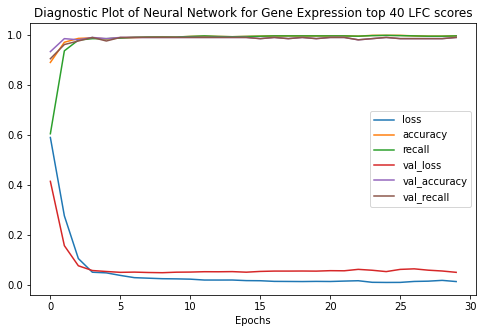

In [63]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.title("Diagnostic Plot of Neural Network for Gene Expression top 40 LFC scores")
plt.xlabel("Epochs")
plt.show()
#plt.savefig("neuralnetworktraining.png")

In [64]:
scores = model.evaluate(X_test_n, y_test_n, batch_size=32)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

check = model.evaluate(X_test_n,y_test_n, batch_size=20)
print(model.metrics_names)
print(check)

3/3 [==============================] - 0s 1ms/step - loss: 0.0021 - accuracy: 1.0000 - recall: 1.0000

accuracy: 100.00%
5/5 [==============================] - 0s 1ms/step - loss: 0.0021 - accuracy: 1.0000 - recall: 1.0000
['loss', 'accuracy', 'recall']
[0.002144976519048214, 1.0, 1.0]


38/38 [==============================] - 0s 660us/step


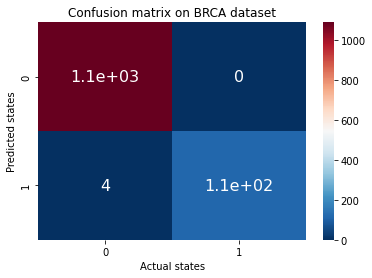

In [65]:
predictions = model.predict(standard_data)
prediction_ = np.argmax(predictions, axis = 1)
confusion_matrix(prediction_, encoded_Y)

sns.heatmap(confusion_matrix(prediction_, encoded_Y), annot=True, annot_kws={"size": 16}, cmap='RdBu_r') # font size
plt.title('Confusion matrix on BRCA dataset')
plt.ylabel('Predicted states')
plt.xlabel('Actual states')
plt.show()

In [101]:
mystery = pd.read_csv("mystery_gene-expr.csv", delimiter=',')


In [96]:
#0 = solid 
#1 = primary tumour 
#bool_tumor = [0 if value == 'Solid Tissue Normal' else 1 for value in mystery['Label'].values]
#mystery['Boolean_tumor'] = bool_tumor

labels = mystery['Label'].values
encoder = LabelEncoder() 
encoder.fit(labels)

encoded_Y = encoder.transform(labels)

# Mystery data

In [68]:
#features = ['Unnamed: 0', 'Label', 'Boolean_tumor']

#replace nan values with the mean in the column     
#for label, content in mystery.iteritems():
    
#    if label not in features:
   
 #       mean = np.nanmean(content)
 #       content.replace(np.nan, mean, inplace=True)

#mystery



In [97]:
labels = ['MMP11.4320', 'ACAN.176', 'GJB2.2706', 
'UBE2C.11065', 'KIF4A.24137', 'NUF2.83540', 'MYBL2.4605', 'IQGAP3.128239', 
'MELK.9833', 'CXCL11.6373', 'KIF14.9928', 'PLK1.5347', 'EXO1.9156', 'FOXM1.2305',
'BIRC5.332', 'HJURP.55355', 'TPX2.22974', 'CDC20.991', 'WISP1.8840', 'CXCL10.3627', 
'CILP2.148113', 'KIF2C.11004', 'ISG15.9636', 'KIF20A.10112', 'PBK.55872', 'GABRD.2563', 
'TOP2A.7153', 'BUB1.699', 'FAM83D.81610', 'UHRF1.29128', 'CEP55.55165', 'DLGAP5.9787', 
'MMP9.4318', 'SKA1.220134', 'CENPA.1058', 
'ANLN.54443', 'NDC80.10403', 'SGOL1.151648', 'RRM2.6241', 'GDF9.2661']


In [70]:

#non_import_cols = []

#for col in mystery_features.columns:
#    column = mystery_features[col]
#     count = len(column[column <= 0.1])
#     if count > 0: #change count of 0s
#         non_import_cols.append(col)

# mystery_sub_df = mystery_features.drop(non_import_cols, axis=1)

# #print(non_import_cols)
# mystery_sub_df



In [98]:
data = mystery[labels]

KeyError: "['UBE2C.11065', 'TPX2.22974', 'WISP1.8840', 'TOP2A.7153', 'UHRF1.29128'] not in index"

In [89]:
#data = mystery[labels]

logged_mystery = np.log2(data+1)

scaler = StandardScaler()
data_s = scaler.fit_transform(logged_mystery)
data_s

array([[-0.25959825,  0.01087275,  0.14607049, ...,  0.01666806,
         0.17751425, -0.74834118],
       [-0.25959825, -1.45506427, -1.03213165, ..., -0.4745515 ,
        -1.11232979, -0.74834118],
       [-0.25959825,  1.18740452, -0.65996652, ..., -0.4745515 ,
        -0.97858875, -0.42569526],
       ...,
       [-0.25959825,  0.7821148 , -0.6712938 , ..., -0.4745515 ,
        -1.69827261, -0.07952632],
       [ 3.86841936, -0.97885128,  0.38251533, ..., -0.4745515 ,
        -0.3498816 , -0.04600543],
       [-0.25959825,  0.93569982,  0.61784964, ..., -0.4745515 ,
        -1.52389288,  0.27453452]])

In [90]:
data_s

array([[-0.25959825,  0.01087275,  0.14607049, ...,  0.01666806,
         0.17751425, -0.74834118],
       [-0.25959825, -1.45506427, -1.03213165, ..., -0.4745515 ,
        -1.11232979, -0.74834118],
       [-0.25959825,  1.18740452, -0.65996652, ..., -0.4745515 ,
        -0.97858875, -0.42569526],
       ...,
       [-0.25959825,  0.7821148 , -0.6712938 , ..., -0.4745515 ,
        -1.69827261, -0.07952632],
       [ 3.86841936, -0.97885128,  0.38251533, ..., -0.4745515 ,
        -0.3498816 , -0.04600543],
       [-0.25959825,  0.93569982,  0.61784964, ..., -0.4745515 ,
        -1.52389288,  0.27453452]])

In [91]:

label_mys = mystery['Label'].values
encoder = LabelEncoder() 
encoder.fit(label_mys)
encoded_Ys = encoder.transform(label_mys) #transform into label encodings (integers)




In [92]:
predictions = svm_classifier.predict(data_s)

sns.heatmap(confusion_matrix(predictions, encoded_Ys), annot=True, annot_kws={"size": 16}, cmap='RdBu_r') # font size
plt.title('Confusion matrix for SVM tested on gene expression of mystery data')
plt.ylabel('Predicted states')
plt.xlabel('Actual states')
plt.show()

ValueError: Input X contains NaN.
SVC does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

0 = tumor , 1 = solid tissue 